In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cancer_classification.csv']))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.shape

(569, 31)

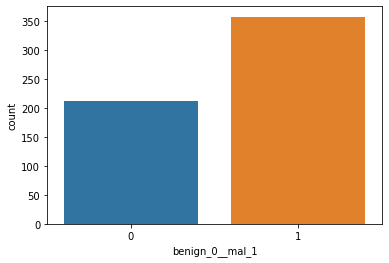

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

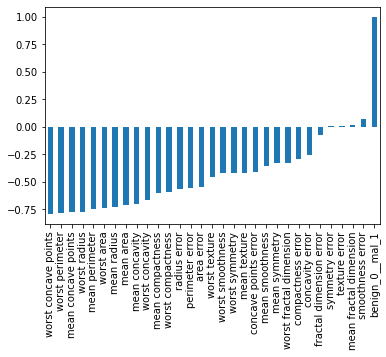

In [ ]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [ ]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler= MinMaxScaler()

In [ ]:
X_train =scaler.fit_transform(X_train)

In [ ]:
X_test =scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model =Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 41ms/step - loss: 0.6884 - val_loss: 0.6733
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6664 - val_loss: 0.6504
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6409 - val_loss: 0.6210
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6066 - val_loss: 0.5854
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5683 - val_loss: 0.5454
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5386 - val_loss: 0.5044
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4956 - val_loss: 0.4630
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4574 - val_loss: 0.4230
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4210 - val_loss: 0.3860
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3765 - val_loss: 0.3490
Epoch 11

In [ ]:
losses =pd.DataFrame(model.history.history)

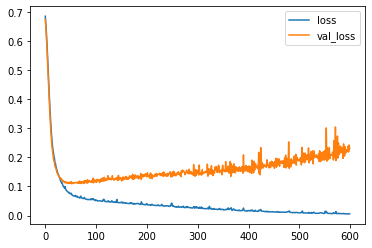

In [ ]:
losses.plot()

In [ ]:
model =Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop] )

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6771 - val_loss: 0.6583
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6520 - val_loss: 0.6358
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6244 - val_loss: 0.6033
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5985 - val_loss: 0.5689
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5645 - val_loss: 0.5308
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5245 - val_loss: 0.4883
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4833 - val_loss: 0.4428
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4433 - val_loss: 0.3951
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3992 - val_loss: 0.3477
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3498 - val_loss: 0.3069
Epoch 11

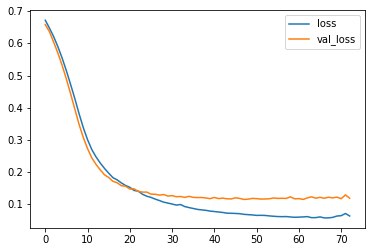

In [ ]:
model_loss= pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout


In [ ]:
model =Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop] )

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.6540 - val_loss: 0.6212
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6360 - val_loss: 0.5964
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6296 - val_loss: 0.5754
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6199 - val_loss: 0.5554
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6090 - val_loss: 0.5356
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5618 - val_loss: 0.5128
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5280 - val_loss: 0.4882
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5228 - val_loss: 0.4646
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5169 - val_loss: 0.4452
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4818 - val_loss: 0.4208
Epoch 11

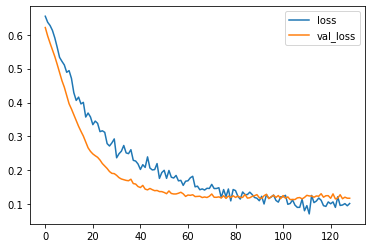

In [ ]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
 predictions =model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
